# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[1]


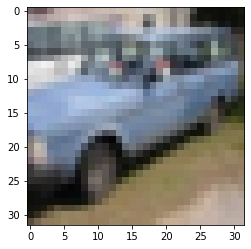

In [7]:
i = 7777
plt.imshow(x_train[i])
print(y_train[i])

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


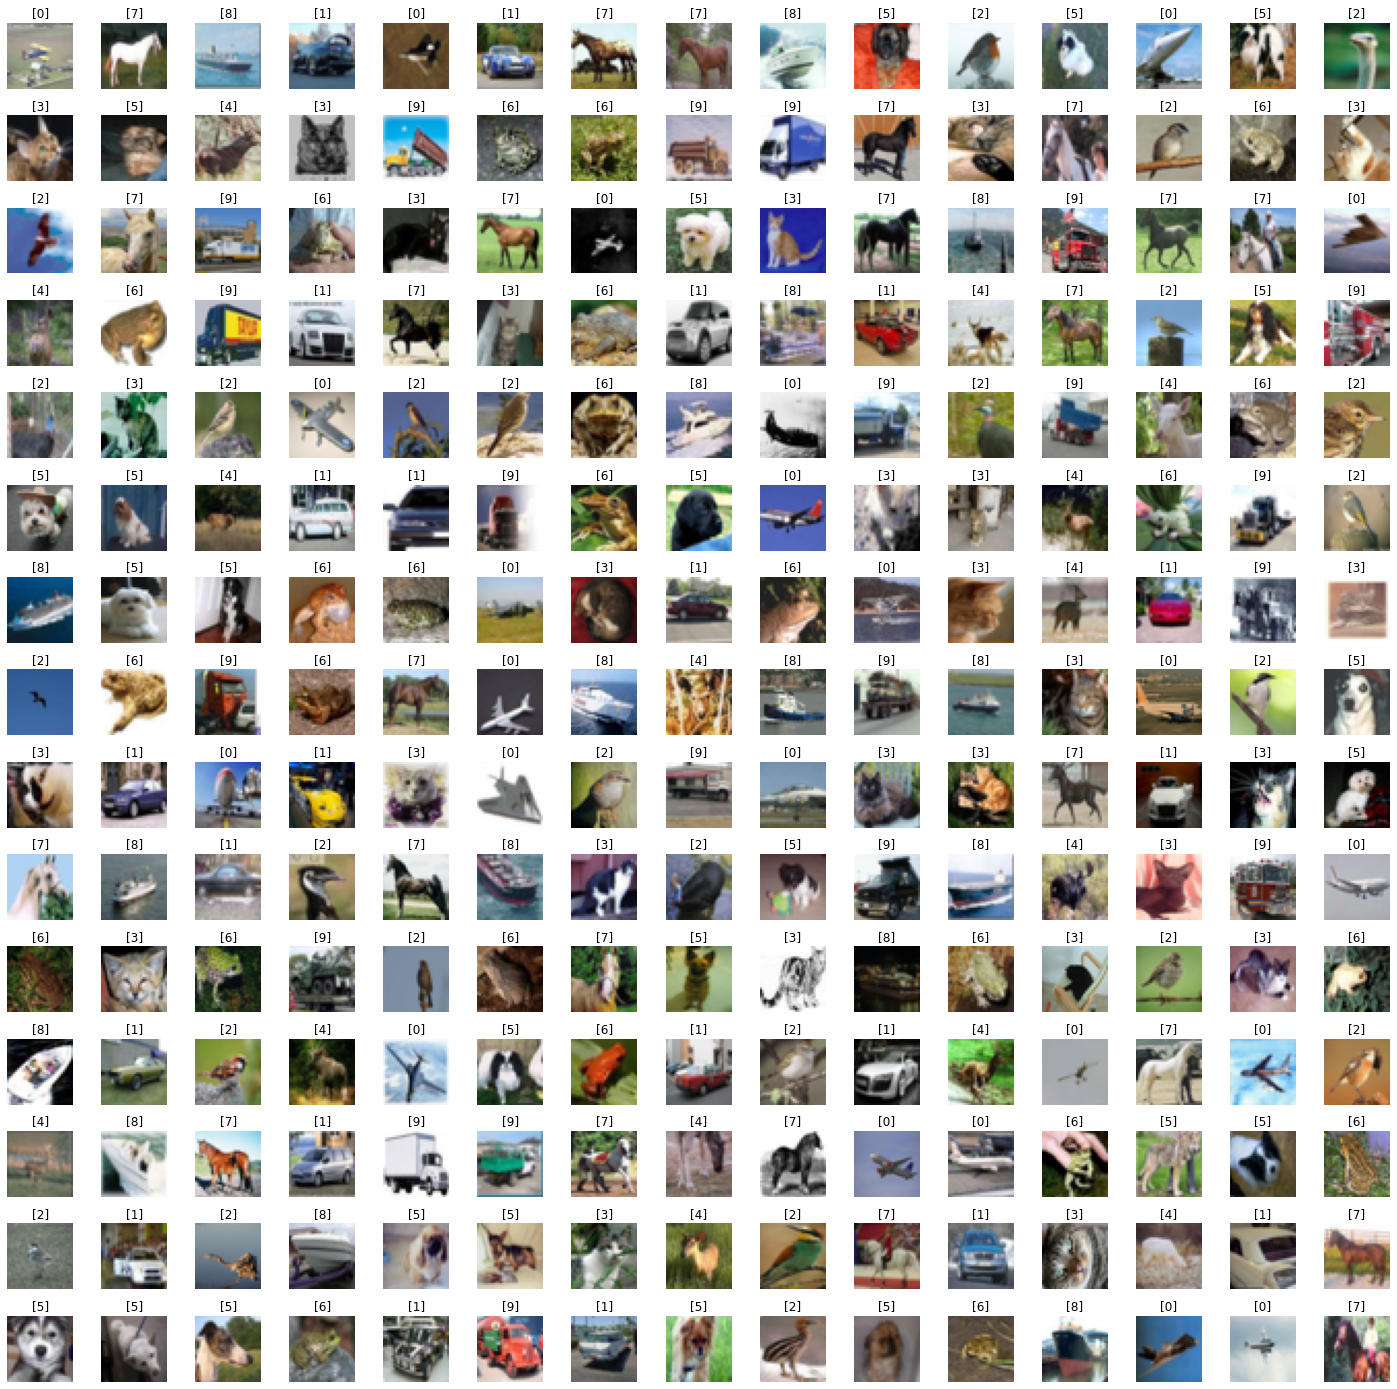

In [8]:
w_grid =15
l_grid =15

fig ,axes = plt.subplots(l_grid,w_grid,figsize=(25,25))

axes =axes.ravel() # to flatten the matrix i.e. will convert 15*15 matrix to 225 array

n_training=len(x_train)

for i in np.arange(0,l_grid*w_grid):# np.arange will create an array from 0 to l_grid*w_grid
    index = np.random.randint(0,n_training)#pick a random number
    axes[i].imshow(x_train[index])# to display images
    axes[i].set_title(y_train[index])# to display label class
    axes[i].axis('off')# to remove numbers on axes
    
plt.subplots_adjust(hspace=.4)
    
    

In [9]:
n_training

50000

# STEP #3: DATA PREPARATION

In [10]:
x_train=x_train.astype('float32')#converting actual images to float datatype gor later image augmentation & training
y_train=y_train.astype('float32')





In [11]:
number_cat =10 #no.of categories

In [12]:
y_train

array([[6.],
       [9.],
       [9.],
       ...,
       [9.],
       [1.],
       [1.]], dtype=float32)

In [13]:
y_train = tf.keras.utils.to_categorical(y_train,number_cat)# converting decimal numbers into categorical values 
#so that training could be easier
y_test = tf.keras.utils.to_categorical(y_test,number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
x_train = x_train/255 #normalizing data
x_test = x_test/255

In [17]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
input_shape = x_train.shape[1:]# Moving forward we will use it to specify input shape(50000 not required)

In [20]:
input_shape # extract the actual size of the image i.e 32*32*3

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,MaxPooling2D ,AveragePooling2D , Dense , Flatten ,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard


In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(.3))       

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(.2)) 

cnn_model.add(Flatten())


cnn_model.add(Dense(units=512,activation='relu'))

cnn_model.add(Dense(units=512,activation='relu'))


cnn_model.add(Dense(units=10,activation='softmax'))



In [23]:
cnn_model.compile(optimizer='adam'  ,loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
cnn_model.fit(x=x_train,y=y_train, batch_size=32 , epochs =2 , shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 246s 157ms/step - loss: 0.2792 - accuracy: 0.3119
Epoch 2/2
1563/1563 [==============================] - 249s 160ms/step - loss: 0.1841 - accuracy: 0.5868


# STEP #5: EVALUATE THE MODEL

In [25]:
evaluation = cnn_model.evaluate(x_test , y_test)
evaluation

313/313 [==============================] - 11s 33ms/step - loss: 0.1584 - accuracy: 0.6557


[0.1584405153989792, 0.6557000279426575]

In [26]:
print("Test Accuracy : {}".format(evaluation[1]))

Test Accuracy : 0.6557000279426575


In [27]:
predicted_classes= cnn_model.predict_classes(x_test)
predicted_classes

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 8, 8, ..., 5, 0, 7])

In [28]:
y_test#since its encoded we have to decode the data to compare

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
y_test =y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

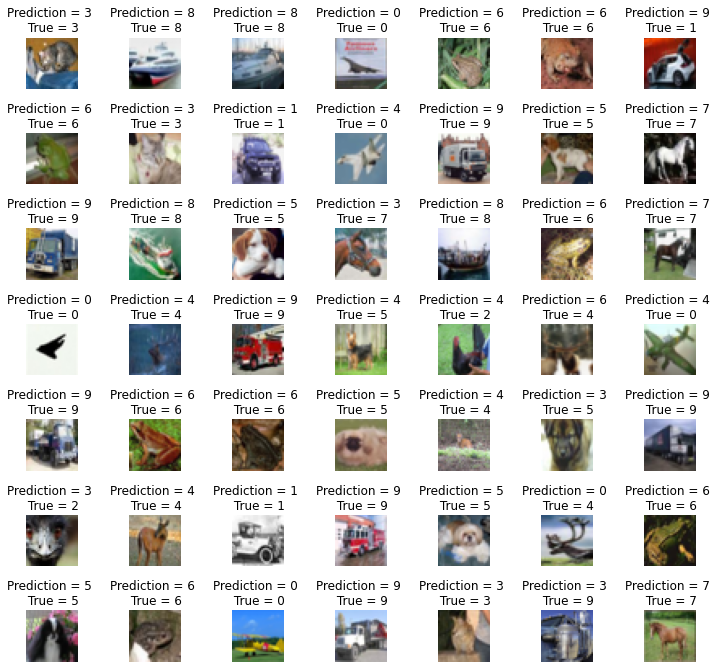

In [32]:
l=7
w=7
fig, axes =plt.subplots(l,w,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)
    

In [33]:
from sklearn.metrics import confusion_matrix , accuracy_score
import seaborn as sns
cm= confusion_matrix(y_test,predicted_classes)
print(cm)
print(accuracy_score(y_test,predicted_classes))

[[653   6 117  10  35   1  13   9 126  30]
 [ 45 742  12   4   8   7  12   4  49 117]
 [ 41   2 595  37 160  38  80   9  29   9]
 [ 17   2 162 327 142 138 121  29  31  31]
 [ 16   4  77  32 662  22 105  64  16   2]
 [  9   3 163 144  94 474  58  39  12   4]
 [  2   1  56  29  59  11 811   7  20   4]
 [ 11   1  89  28 136  54   9 657   4  11]
 [ 58  18  24   8   8   5   9   3 844  23]
 [ 43  39  18  13  20   6  19  13  37 792]]
0.6557


<AxesSubplot:>

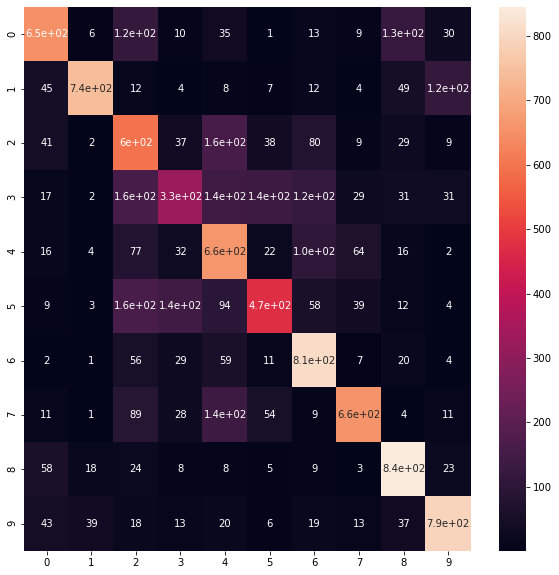

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

# STEP #6: SAVING THE MODEL

In [36]:
import os
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory , 'keras_cifar10_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET